Q1

With the coefficient of correlation at Q3 by doing linear regression, we can know that coefficients are:

In [5]:
fea = ['comp_page_like', 'Paid', 'life_post_reach', 'life_post_impression_liked', 'life_post_reach_liked', 'comment', 'like',
         'share', 'type_link', 'type_status', 'type_video', 'cat2', 'cat3', 'month1', 'month2', 'month3', 'month4', 'month5',
        'month6', 'month7', 'month8', 'month9', 'month10', 'month11', 'dow1', 'dow2', 'dow3', 'dow4', 'dow5', 'dow6', 'hour2',
        'hour3', 'hour4', 'hour5', 'hour6','hour7','hour8','hour9','hour10','hour11','hour12','hour13','hour14']
co = [-6.84041869e-02,  1.47059738e+02,  1.79110681e-02, -2.16009708e-04,
  4.82031391e-03,  6.82142207e+00, -6.16764110e-01,  7.54278783e+00,
 -6.21049994e+02,  1.36848882e+03,  4.97452472e+01, -1.38262367e+02,
 -1.26645530e+02, -3.29149472e+03, -2.51197518e+03, -2.25561939e+03,
 -2.01896194e+03, -1.46269926e+03, -8.19825357e+02, -6.27382449e+02,
 -4.92601748e+02, -2.48659622e+02, -2.36794218e+02, -4.82011162e+02,
  1.52303860e+02, -1.73784341e+02,  3.07368828e+01, -1.95575170e+02,
 -7.06704408e+01, -3.15301940e+01,  4.16815100e+02,  1.07380770e+02,
  9.14301654e+01,  2.83858616e+02,  1.43729454e+02,  2.91776822e+02,
  2.08722883e+02,  3.14488457e+02,  2.09001499e+02,  2.35519102e+02,
  1.60020944e+02,  1.54781652e+02,  2.20833236e+02]
for i in range(0, 43):
    print(fea[i], ':  ',co[i])

comp_page_like :   -0.0684041869
Paid :   147.059738
life_post_reach :   0.0179110681
life_post_impression_liked :   -0.000216009708
life_post_reach_liked :   0.00482031391
comment :   6.82142207
like :   -0.61676411
share :   7.54278783
type_link :   -621.049994
type_status :   1368.48882
type_video :   49.7452472
cat2 :   -138.262367
cat3 :   -126.64553
month1 :   -3291.49472
month2 :   -2511.97518
month3 :   -2255.61939
month4 :   -2018.96194
month5 :   -1462.69926
month6 :   -819.825357
month7 :   -627.382449
month8 :   -492.601748
month9 :   -248.659622
month10 :   -236.794218
month11 :   -482.011162
dow1 :   152.30386
dow2 :   -173.784341
dow3 :   30.7368828
dow4 :   -195.57517
dow5 :   -70.6704408
dow6 :   -31.530194
hour2 :   416.8151
hour3 :   107.38077
hour4 :   91.4301654
hour5 :   283.858616
hour6 :   143.729454
hour7 :   291.776822
hour8 :   208.722883
hour9 :   314.488457
hour10 :   209.001499
hour11 :   235.519102
hour12 :   160.020944
hour13 :   154.781652
hour14 :   22

We can know that compare to continuous features(comp_page_like, life_post_reach, life_post_impression_liked, life_post_reach_liked, comment, like, share), binary features(the other)' coefficients are bigger because of the small value of features.

Q2

In [6]:
import math
import csv
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

x_mean = []
x_std = []
y = []
x = np.array([])
with open('df1_train.csv', 'r') as db01:
    reader = csv.DictReader(db01)
    train_y = [row['life_post_consumer'] for row in reader]
    tra_y = np.array(np.float_(train_y))
    y = tra_y

x_fea = ['comp_page_like', 'Paid', 'life_post_reach', 'life_post_impression_liked', 'life_post_reach_liked', 'comment', 'like',
         'share', 'type_link', 'type_status', 'type_video', 'cat2', 'cat3', 'month1', 'month2', 'month3', 'month4', 'month5',
        'month6', 'month7', 'month8', 'month9', 'month10', 'month11', 'dow1', 'dow2', 'dow3', 'dow4', 'dow5', 'dow6', 'hour2',
        'hour3', 'hour4', 'hour5', 'hour6','hour7','hour8','hour9','hour10','hour11','hour12','hour13','hour14']
for item in x_fea:
    with open('df1_train.csv', 'r') as db02:
        reader = csv.DictReader(db02)
        train_x = [row[item] for row in reader]
        tra_x = np.array(np.float_(train_x))
        x_mean.append(np.mean(tra_x))
        x_std.append(np.std(tra_x))
        x = np.concatenate([x,tra_x])
x_r = x.reshape((len(x_fea), len(y)))
x = x_r.T
# print(y)
# print(x)
y_mean = np.mean(y)

y_test = []
x_test = np.array([])
with open('df1_test1y.csv', 'r') as db03:
    reader = csv.DictReader(db03)
    t_y = [row['life_post_consumer'] for row in reader]
    y_t = np.array(np.float_(t_y))
    y_test = y_t

for item in x_fea:
    with open('df1_test1.csv', 'r') as db04:
        reader = csv.DictReader(db04)
        t_x = [row[item] for row in reader]
        te_x = np.array(np.float_(t_x))
        x_test = np.concatenate([x_test,te_x])
xtest_r = x_test.reshape((len(x_fea), len(y_test)))
x_test = xtest_r.T
# print(y_test)
# print(x_test)
x_test20 = x_test[:20]
y_test20 = y_test[:20]
# print(x_test20)
# print(y_test20)

dy = y - np.mean(y)


# cbstdxlist = []
# cstdxlist = []
cbstdx = np.array([])
cstdx = np.array([])
for item in x_fea:
    with open('df1_train.csv', 'r') as db05:
        reader = csv.DictReader(db05)
        train_x = [row[item] for row in reader]
        tra_x = np.array(np.float_(train_x))
        x1_std = np.std(tra_x)
        tra_x = tra_x - np.mean(tra_x)
        tra_x = tra_x / x1_std
        tra_x = np.array(np.float_(tra_x))
        cbstdx = np.concatenate([cbstdx, tra_x])
x_r = cbstdx.reshape((len(x_fea), len(y)))
cbstdx = x_r.T
# print(cbstdx)
x_fea1 = ['life_post_reach', 'life_post_impression_liked', 'life_post_reach_liked', 'comment', 'like',
         'share']
x_fea2 = ['type_link', 'type_status', 'type_video', 'cat2', 'cat3', 'month1', 'month2', 'month3', 'month4', 'month5',
        'month6', 'month7', 'month8', 'month9', 'month10', 'month11', 'dow1', 'dow2', 'dow3', 'dow4', 'dow5', 'dow6', 'hour2',
        'hour3', 'hour4', 'hour5', 'hour6','hour7','hour8','hour9','hour10','hour11','hour12','hour13','hour14']


with open('df1_train.csv', 'r') as db06:
    reader = csv.DictReader(db06)
    train_x = [row['comp_page_like'] for row in reader]
    tra_x = np.array(np.float_(train_x))
    x1_std = np.std(tra_x)
    tra_x = tra_x - np.mean(tra_x)
    tra_x = tra_x / x1_std
    tra_x = np.array(np.float_(tra_x))
    cstdx = np.concatenate([cstdx,tra_x])
    
with open('df1_train.csv', 'r') as db07:
    reader = csv.DictReader(db07)
    train_x = [row['Paid'] for row in reader]
    tra_x = np.array(np.float_(train_x))
    cstdx = np.concatenate([cstdx,tra_x])

for item in x_fea1:
    with open('df1_train.csv', 'r') as db08:
        reader = csv.DictReader(db08)
        train_x = [row[item] for row in reader]
        tra_x = np.array(np.float_(train_x))
        x1_std = np.std(tra_x)
        tra_x = tra_x - np.mean(tra_x)
        tra_x = tra_x / x1_std
        tra_x = np.array(np.float_(tra_x))
        cstdx = np.concatenate([cstdx,tra_x])

for item in x_fea2:
    with open('df1_train.csv', 'r') as db09:
        reader = csv.DictReader(db09)
        train_x = [row[item] for row in reader]
        tra_x = np.array(np.float_(train_x))
        cstdx = np.concatenate([cstdx,tra_x])
x_r = cstdx.reshape((len(x_fea), len(y)))
cstdx = x_r.T

# print(cbstdx)
# print(cstdx)
count = 0
cbstdx_test = np.array([])
cstdx_test = np.array([])
for item in x_fea:
    with open('df1_test1.csv', 'r') as db10:
        reader = csv.DictReader(db10)
        train_x = [row[item] for row in reader]
        tra_x = np.array(np.float_(train_x))
        tra_x = tra_x - x_mean[count]
        tra_x = tra_x / x_std[count]
        count += 1
        tra_x = np.array(np.float_(tra_x))
        cbstdx_test = np.concatenate([cbstdx_test, tra_x])
x_r = cbstdx_test.reshape((len(x_fea), len(y_test)))
cbstdx_test = x_r.T
# print(cbstdx)
x_fea1 = ['life_post_reach', 'life_post_impression_liked', 'life_post_reach_liked', 'comment', 'like',
         'share']
x_fea2 = ['type_link', 'type_status', 'type_video', 'cat2', 'cat3', 'month1', 'month2', 'month3', 'month4', 'month5',
        'month6', 'month7', 'month8', 'month9', 'month10', 'month11', 'dow1', 'dow2', 'dow3', 'dow4', 'dow5', 'dow6', 'hour2',
        'hour3', 'hour4', 'hour5', 'hour6','hour7','hour8','hour9','hour10','hour11','hour12','hour13','hour14']

count2 = 0
with open('df1_test1.csv', 'r') as db11:
    reader = csv.DictReader(db11)
    train_x = [row['comp_page_like'] for row in reader]
    tra_x = np.array(np.float_(train_x))
    tra_x = tra_x - x_mean[count2]
    tra_x = tra_x / x_std[count2]
    tra_x = np.array(np.float_(tra_x))
    cstdx_test = np.concatenate([cstdx_test,tra_x])

count2 += 1

with open('df1_test1.csv', 'r') as db12:
    reader = csv.DictReader(db12)
    train_x = [row['Paid'] for row in reader]
    tra_x = np.array(np.float_(train_x))
    cstdx_test = np.concatenate([cstdx_test,tra_x])

count2 += 1

for item in x_fea1:
    with open('df1_test1.csv', 'r') as db13:
        reader = csv.DictReader(db13)
        train_x = [row[item] for row in reader]
        tra_x = np.array(np.float_(train_x))
        tra_x = tra_x - x_mean[count2]
        tra_x = tra_x / x_std[count2]
        count2 += 1
        tra_x = np.array(np.float_(tra_x))
        cstdx_test = np.concatenate([cstdx_test,tra_x])

for item in x_fea2:
    with open('df1_test1.csv', 'r') as db14:
        reader = csv.DictReader(db14)
        train_x = [row[item] for row in reader]
        tra_x = np.array(np.float_(train_x))
        cstdx_test = np.concatenate([cstdx_test,tra_x])
x_r = cstdx_test.reshape((len(x_fea), len(y_test)))
cstdx_test = x_r.T
# print(cbstdx_test)
# print(cstdx_test)
xcb_test20 = cbstdx_test[:20]
xc_test20 = cstdx_test[:20]
# print(xcb_test20)

In [7]:

# print(y_mean)
y_pred = [y_mean]*len(y_test)
# a = 0
# for i in range(0, len(y_test20)):
#     a+=((y_test20[i] - y_pred[i])**2)
# a = a / 20
# print(a)
print('Root mean squared error: ', rmse(y_test, y_pred))
print('Prediction: \n', y_pred[:20])
print('True outcome value: \n', y_test20)

Root mean squared error:  928.8095109332162
Prediction: 
 [810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34]
True outcome value: 
 [1183.  189. 2327.   76.  354.  713.  204.  288.  555.  586.  446.  884.
  524.  672.   23.  570. 1361. 5934. 2319. 1633.]


Q3

In [8]:
reg = linear_model.LinearRegression()
reg.fit(x, y)
y_pred = reg.predict(x_test)

print('Coefficients: \n', reg.coef_)
print('Root mean squared error: ', rmse(y_test, y_pred))
print('Prediction: \n', y_pred[:20])
print('True outcome value: \n', y_test20)
# print(len(x_test20))
# print(len(y_test20))
# print(len(y_pred))

Coefficients: 
 [-6.84041869e-02  1.47059738e+02  1.79110681e-02 -2.16009708e-04
  4.82031391e-03  6.82142207e+00 -6.16764110e-01  7.54278783e+00
 -6.21049994e+02  1.36848882e+03  4.97452472e+01 -1.38262367e+02
 -1.26645530e+02 -3.29149472e+03 -2.51197518e+03 -2.25561939e+03
 -2.01896194e+03 -1.46269926e+03 -8.19825357e+02 -6.27382449e+02
 -4.92601748e+02 -2.48659622e+02 -2.36794218e+02 -4.82011162e+02
  1.52303860e+02 -1.73784341e+02  3.07368828e+01 -1.95575170e+02
 -7.06704408e+01 -3.15301940e+01  4.16815100e+02  1.07380770e+02
  9.14301654e+01  2.83858616e+02  1.43729454e+02  2.91776822e+02
  2.08722883e+02  3.14488457e+02  2.09001499e+02  2.35519102e+02
  1.60020944e+02  1.54781652e+02  2.20833236e+02]
Root mean squared error:  692.2891271362014
Prediction: 
 [ 781.57991507  315.92043112 2279.0848524  -136.34286373  302.35624062
  462.42402368  321.67770824  504.52244768  505.89547104  488.36700578
  392.61423519  388.9184671   804.87527509  634.32364432  176.31765618
  645.7291381

Q4

In [9]:
reg = linear_model.LinearRegression()
reg.fit(x, dy)
y_pred = reg.predict(x_test)
y_pred += np.mean(y)
print('Coefficients: \n', reg.coef_)
print('Root mean squared error: ', rmse(y_test, y_pred))
print('Prediction: \n', y_pred[:20])
print('True outcome value: \n', y_test20)

Coefficients: 
 [-6.84041869e-02  1.47059738e+02  1.79110681e-02 -2.16009708e-04
  4.82031391e-03  6.82142207e+00 -6.16764110e-01  7.54278783e+00
 -6.21049994e+02  1.36848882e+03  4.97452472e+01 -1.38262367e+02
 -1.26645530e+02 -3.29149472e+03 -2.51197518e+03 -2.25561939e+03
 -2.01896194e+03 -1.46269926e+03 -8.19825357e+02 -6.27382449e+02
 -4.92601748e+02 -2.48659622e+02 -2.36794218e+02 -4.82011162e+02
  1.52303860e+02 -1.73784341e+02  3.07368828e+01 -1.95575170e+02
 -7.06704408e+01 -3.15301940e+01  4.16815100e+02  1.07380770e+02
  9.14301654e+01  2.83858616e+02  1.43729454e+02  2.91776822e+02
  2.08722883e+02  3.14488457e+02  2.09001499e+02  2.35519102e+02
  1.60020944e+02  1.54781652e+02  2.20833236e+02]
Root mean squared error:  692.2891271361826
Prediction: 
 [ 781.57991507  315.92043112 2279.0848524  -136.34286373  302.35624062
  462.42402368  321.67770824  504.52244768  505.89547104  488.36700578
  392.61423519  388.9184671   804.87527509  634.32364432  176.31765618
  645.7291381

Q5

In [10]:
reg = linear_model.LinearRegression()
reg.fit(cbstdx, dy)
# print(xcb_test20)
y_pred = reg.predict(cbstdx_test)
y_pred += np.mean(y)
print('Coefficients: \n', reg.coef_)
print('Root mean squared error: ', rmse(y_test, y_pred))
print('Prediction: \n', y_pred[:20])
print('True outcome value: \n', y_test20)

Coefficients: 
 [-1112.23556456    64.50543678   365.90575515   -14.2701213
    36.58484983    98.12277774  -149.77761448   195.46225799
  -117.98928375   376.50544869     6.52284258   -60.64660861
   -57.75577731  -750.39582885  -520.74281602  -611.93419943
  -591.9897999   -402.4250919   -253.93916747  -188.21473457
  -121.43906982   -60.19091084   -76.94901295  -142.98254033
    54.00750506   -60.30091276    10.33691924   -64.12174356
   -23.95965064   -11.77405798   113.07910209    43.73707223
    23.32813391    42.09705574    24.51840812    51.7389913
    30.95420869    76.12553473    74.62846243    68.23706214
    36.4816169     46.94600466    34.47757789]
Root mean squared error:  692.2891271372005
Prediction: 
 [ 781.57991507  315.92043112 2279.0848524  -136.34286373  302.35624062
  462.42402368  321.67770824  504.52244767  505.89547104  488.36700578
  392.61423519  388.9184671   804.87527509  634.32364432  176.31765618
  645.72913809 1983.53858871 3144.39710045 4060.61071219 4

Q6

alpha: 0.01 RMSE: 691.7564197164963
alpha: 0.1 RMSE: 690.4794727071568
alpha: 1 RMSE: 684.0592940464089
alpha: 5 RMSE: 666.3743642523864
alpha: 10 RMSE: 660.5612900111673
alpha: 20 RMSE: 664.8697142964962
alpha: 50 RMSE: 690.4193469387994
alpha: 100 RMSE: 717.1282790306161
alpha: 500 RMSE: 763.7089594553058
alpha: 1000 RMSE: 773.6019481998379
While alpha = 10, we have the best RMSE: 660.5612900111673
Prediction: 
 [1068.33362385  229.7553192  2008.55889192 -102.8748995   541.45769947
  606.45925756  414.98279829  602.81051442  500.18438508  492.30663558
  508.37649961  409.13002153  730.46768043  561.0603282   294.45089723
  602.48286746 1632.18271503 2698.88281782 3841.63152846 3892.40090903]
True outcome value: 
 [1183.  189. 2327.   76.  354.  713.  204.  288.  555.  586.  446.  884.
  524.  672.   23.  570. 1361. 5934. 2319. 1633.]


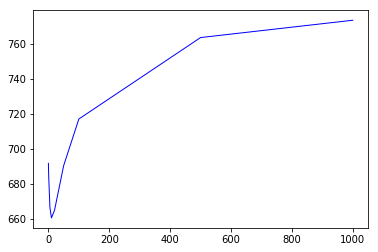

In [11]:
rlist = []
al = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
for i in range(0, len(al)):
    reg = linear_model.Ridge(alpha=al[i])
    reg.fit(x, y)
    y_pred = reg.predict(x_test)
    print('alpha:', al[i] ,'RMSE:', rmse(y_test, y_pred))
    rlist.append(rmse(y_test, y_pred))
plt.plot(al, rlist, color='blue', linewidth=1)
print('While alpha = 10, we have the best RMSE: 660.5612900111673')
reg = linear_model.Ridge(alpha=10)
reg.fit(x, y)
y_pred = reg.predict(x_test)
print('Prediction: \n', y_pred[:20])
print('True outcome value: \n', y_test20)

Q7

alpha: 0.01 RMSE: 691.7304747036972
alpha: 0.1 RMSE: 690.3052303627677
alpha: 1 RMSE: 681.8131356980052
alpha: 5 RMSE: 657.2468972576442
alpha: 10 RMSE: 646.3608224506862
alpha: 20 RMSE: 645.5168123938738
alpha: 50 RMSE: 666.5003100788468
alpha: 100 RMSE: 692.0599326959293
alpha: 500 RMSE: 752.843210942966
alpha: 1000 RMSE: 785.4978029227881
While alpha = 20, we have the best RMSE: 645.5168123938738
Prediction: 
 [1142.26954234  254.15701492 1834.02488944   15.7181687   599.76366292
  635.94038984  427.85644416  603.66205989  514.52378787  580.00106007
  544.34176021  477.18442084  801.54554542  557.45287238  396.27886548
  615.15152412 1474.67417376 2504.86437273 3524.85964481 3438.40343713]
True outcome value: 
 [1183.  189. 2327.   76.  354.  713.  204.  288.  555.  586.  446.  884.
  524.  672.   23.  570. 1361. 5934. 2319. 1633.]


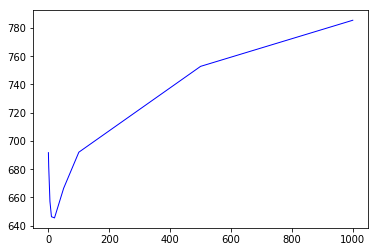

In [16]:
rlist = []
al = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
# print(cstdx[0])
for i in range(0, len(al)):
    reg = linear_model.Ridge(alpha=al[i])
    reg.fit(cstdx, dy)
    y_pred = reg.predict(cstdx_test)
    y_pred += np.mean(y)
    print('alpha:', al[i] ,'RMSE:', rmse(y_test, y_pred))
    rlist.append(rmse(y_test, y_pred))
plt.plot(al, rlist, color='blue', linewidth=1)
print('While alpha = 20, we have the best RMSE: 645.5168123938738')
reg = linear_model.Ridge(alpha=20)
reg.fit(cstdx, dy)
y_pred = reg.predict(cstdx_test)
y_pred += np.mean(y)
print('Prediction: \n', y_pred[:20])
print('True outcome value: \n', y_test20)

Q8

alpha: 0.01 RMSE: 691.7564197164965
alpha: 0.1 RMSE: 690.4794727071567
alpha: 1 RMSE: 684.0592940464086
alpha: 5 RMSE: 666.374364252386
alpha: 10 RMSE: 660.5612900111672
alpha: 20 RMSE: 664.8697142964962
alpha: 50 RMSE: 690.4193469387993
alpha: 100 RMSE: 717.128279030616
alpha: 500 RMSE: 763.7089594553057
alpha: 1000 RMSE: 773.6019481998379
While alpha = 10, we have the best RMSE: 660.5612900111673
Prediction: 
 [1068.33362385  229.7553192  2008.55889192 -102.8748995   541.45769947
  606.45925756  414.98279829  602.81051442  500.18438508  492.30663558
  508.37649961  409.13002153  730.46768043  561.0603282   294.45089723
  602.48286746 1632.18271503 2698.88281782 3841.63152846 3892.40090903]
True outcome value: 
 [1183.  189. 2327.   76.  354.  713.  204.  288.  555.  586.  446.  884.
  524.  672.   23.  570. 1361. 5934. 2319. 1633.]


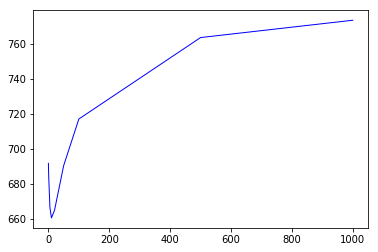

In [17]:
rlist = []
al = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
for i in range(0, len(al)):
    reg = linear_model.Ridge(alpha=al[i])
    reg.fit(x, dy)
    y_pred = reg.predict(x_test)
    y_pred += np.mean(y)
    print('alpha:', al[i] ,'RMSE:', rmse(y_test, y_pred))
    rlist.append(rmse(y_test, y_pred))
plt.plot(al, rlist, color='blue', linewidth=1)
print('While alpha = 10, we have the best RMSE: 660.5612900111673')
reg = linear_model.Ridge(alpha=10)
reg.fit(x, y)
y_pred = reg.predict(x_test)
print('Prediction: \n', y_pred[:20])
print('True outcome value: \n', y_test20)

Q9

alpha: 0.01 RMSE: 692.2087640655772
alpha: 0.1 RMSE: 691.5858824497669
alpha: 1 RMSE: 688.6097668298786
alpha: 5 RMSE: 678.5305952097792
alpha: 10 RMSE: 666.4517811295049
alpha: 20 RMSE: 646.6515060786201
alpha: 50 RMSE: 611.0884912149864
alpha: 100 RMSE: 588.793465752767
alpha: 500 RMSE: 636.3128466062185
alpha: 1000 RMSE: 701.4633991861974
While alpha = 100, we have the best RMSE: 588.793465752767
Prediction: 
 [ 816.33744416 1122.75249539 2434.75840681  682.10092152 1503.08797383
  724.71830555  949.52603131 1643.08266105  864.18279463 1021.90627855
 1404.04409904 1206.19061709 1098.66572121  929.26454265  783.90556398
 1328.00719196 2445.21331553 2681.65245239 1324.07212627 1491.20689139]
True outcome value: 
 [1183.  189. 2327.   76.  354.  713.  204.  288.  555.  586.  446.  884.
  524.  672.   23.  570. 1361. 5934. 2319. 1633.]


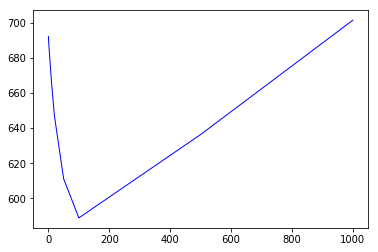

In [18]:
rlist = []
al = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
for i in range(0, len(al)):
    reg = linear_model.Ridge(alpha=al[i])
    reg.fit(cbstdx, dy)
    y_pred = reg.predict(cbstdx_test)
    y_pred += np.mean(y)
    print('alpha:', al[i] ,'RMSE:', rmse(y_test, y_pred))
    rlist.append(rmse(y_test, y_pred))
plt.plot(al, rlist, color='blue', linewidth=1)
print('While alpha = 100, we have the best RMSE: 588.793465752767')
reg = linear_model.Ridge(alpha=100)
reg.fit(x, y)
y_pred = reg.predict(cbstdx_test)
print('Prediction: \n', y_pred[:20])
print('True outcome value: \n', y_test20)

Q10

alpha: 0.01 RMSE: 692.0179472084134
alpha: 0.1 RMSE: 690.2394507507341
alpha: 1 RMSE: 679.4855631220257
alpha: 5 RMSE: 654.3119134751014
alpha: 10 RMSE: 643.3838482161635
alpha: 20 RMSE: 650.1282310013416
alpha: 50 RMSE: 687.570212319791
alpha: 100 RMSE: 800.1430462841631
alpha: 500 RMSE: 928.8095109332162
alpha: 1000 RMSE: 928.8095109332162
While alpha = 10, we have the best RMSE: 643.3838482161635
Prediction: 
 [1507.25146707 1569.99640404 2827.35368137 1257.44645097 1574.7017289
 1441.01863549 1460.24394622 1726.81564049 1579.48785426 1395.75198094
 1555.33142348 1514.55966705 1532.57676339 1519.58491398 1267.62271322
 1655.05832572 2737.03102841 2900.97512413 1619.5844267  1723.45888789]
True outcome value: 
 [1183.  189. 2327.   76.  354.  713.  204.  288.  555.  586.  446.  884.
  524.  672.   23.  570. 1361. 5934. 2319. 1633.]


C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


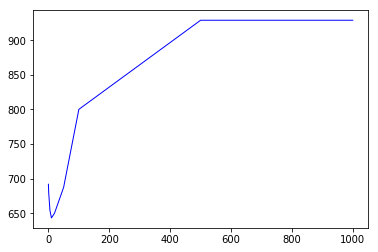

In [19]:
rlist = []
al = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
for i in range(0, len(al)):
    reg = linear_model.Lasso(alpha=al[i])
    reg.fit(cstdx, dy)
    y_pred = reg.predict(cstdx_test)
    y_pred += np.mean(y)
    print('alpha:', al[i] ,'RMSE:', rmse(y_test, y_pred))
    rlist.append(rmse(y_test, y_pred))
plt.plot(al, rlist, color='blue', linewidth=1)
print('While alpha = 10, we have the best RMSE: 643.3838482161635')
reg = linear_model.Lasso(alpha=10)
reg.fit(x, y)
y_pred = reg.predict(cstdx_test)
print('Prediction: \n', y_pred[:20])
print('True outcome value: \n', y_test20)

Q11

Case   | Method| x_continue | x_binary | y     | best RMSE | alpha
-------|:-----:|-----------:| --------:|------:|----------:|-----:
1      | ymean |  not used  | not used |  keep | 928.81    | NA
2A     | OLS   |  keep      | keep     |  keep | 692.29    | NA
2B     | OLS   |  keep      | keep     |de-mean| 692.29    | NA
2C     | OLS   |  std.      | std.     |de-mean| 692.29    | NA
3A     | Ridge |  keep      | keep     |  keep | 660.56    | 10
3B     | Ridge |  std.      | keep     |de-mean| 645.52    | 20
3C     | Ridge |  keep      | keep     |de-mean| 660.56    | 10
3D     | Ridge |  std.      | std.     |de-mean| 588.79    |100
4      | Lasso |  std.      | keep     |de-mean| 643.38    | 10

ymean is the worst method, which has the biggest best RMSE.
<br>
For OLS, standardizing doesn't affect the result of RMSE.
<br>
For Ridge, standardizing could reduce the value of result of RMSE.
<br>
For Lasso, we don't know the difference between standardizing or not.
<br>
3D is the best case, which has the smallest best RMSE.